# 0. Set up

In [13]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [14]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

In [15]:
print(X_train.shape)
X_train[0]

(50000, 32, 32, 3)


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [16]:
print(y_train.shape)
y_train

(50000, 1)


array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [17]:
# Reshape to become 1D array
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [18]:
X_test.shape

(10000, 32, 32, 3)

In [19]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [20]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

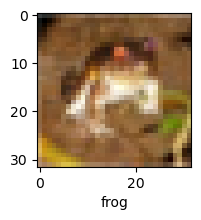

In [21]:
plot_sample(X_train, y_train, 0)

# 1. Preprocessing

## 1.1 Standardise and normalise

In [22]:
X_train = X_train/255
X_test = X_test/255

# 2. Model

## 2.1 Without CNN

In [23]:
ann = models.Sequential([
        layers.Flatten(input_shape = (32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
])

ann.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy']
)

history = ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 184s 117ms/step - loss: 1.8823 - accuracy: 0.3312
Epoch 2/5
1563/1563 [==============================] - 171s 109ms/step - loss: 1.6537 - accuracy: 0.4057
Epoch 3/5
1563/1563 [==============================] - 177s 113ms/step - loss: 1.5662 - accuracy: 0.4414
Epoch 4/5
1563/1563 [==============================] - 182s 116ms/step - loss: 1.5221 - accuracy: 0.4563
Epoch 5/5
1563/1563 [==============================] - 169s 108ms/step - loss: 1.4775 - accuracy: 0.4709


In [24]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred] #returns index of the highest arg

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 3s 9ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.48      0.54      1000
           1       0.59      0.66      0.62      1000
           2       0.41      0.22      0.29      1000
           3       0.33      0.22      0.26      1000
           4       0.40      0.45      0.42      1000
           5       0.37      0.45      0.40      1000
           6       0.46      0.63      0.53      1000
           7       0.55      0.54      0.54      1000
           8       0.59      0.65      0.62      1000
           9       0.52      0.56      0.54      1000

    accuracy                           0.49     10000
   macro avg       0.48      0.49      0.48     10000
weighted avg       0.48      0.49      0.48     10000



## 2.2 CNN Model

In [25]:
cnn = models.Sequential([

    #Convolution
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)), #(30,30,64)
    layers.MaxPooling2D((2,2)), #(15,15,64)

    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'), #(13,13,32)
    layers.MaxPooling2D((2,2)), #(6,6,32)

    layers.Flatten(), #(1152)

    #ANN
    layers.Dense(500, activation='relu'), #(500)
    layers.Dense(10, activation='softmax')

])

cnn.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy']
)

history = cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 39s 25ms/step - loss: 1.3918 - accuracy: 0.5027
Epoch 2/5
1563/1563 [==============================] - 38s 24ms/step - loss: 1.0424 - accuracy: 0.6342
Epoch 3/5
1563/1563 [==============================] - 53s 34ms/step - loss: 0.8793 - accuracy: 0.6914
Epoch 4/5
1563/1563 [==============================] - 53s 34ms/step - loss: 0.7477 - accuracy: 0.7386
Epoch 5/5
1563/1563 [==============================] - 56s 36ms/step - loss: 0.6356 - accuracy: 0.7788


In [26]:
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred] #returns index of the highest arg

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 2s 7ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.77      0.73      1000
           1       0.80      0.84      0.82      1000
           2       0.62      0.58      0.60      1000
           3       0.60      0.38      0.47      1000
           4       0.62      0.70      0.66      1000
           5       0.63      0.61      0.62      1000
           6       0.67      0.86      0.75      1000
           7       0.83      0.72      0.77      1000
           8       0.74      0.84      0.79      1000
           9       0.82      0.73      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

